In [1]:
import numpy as np
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras_metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score, precision_recall_curve
import joblib

In [2]:
X = np.load('X_data.npy', allow_pickle=True)
Y = np.load('Y_data.npy', allow_pickle=True)

In [3]:
Y = Y.reshape(-1,1)
X = X / 255
Y = np.abs(Y - 1)
X = np.array([ i.reshape(i.shape[0]*i.shape[1]*i.shape[2]) for i in X])

In [4]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25)

In [5]:
lr = LogisticRegression(penalty='l2').fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
precision_score(y_true=Y_valid, y_pred=lr.predict(X_valid)), precision_score(y_true=Y_train, y_pred=lr.predict(X_train))

(1.0, 1.0)

In [7]:
Y_train.sum(), Y_valid.sum()

(92, 27)

In [8]:
recall_score(y_true=Y_valid, y_pred=lr.predict(X_valid)), recall_score(y_true=Y_train, y_pred=lr.predict(X_train))

(1.0, 1.0)

In [9]:
prec, rec, tresholds = precision_recall_curve(y_true=Y_valid, probas_pred=lr.predict(X_valid))

In [10]:
np.where(prec > 0.95)

(array([0, 1], dtype=int64),)

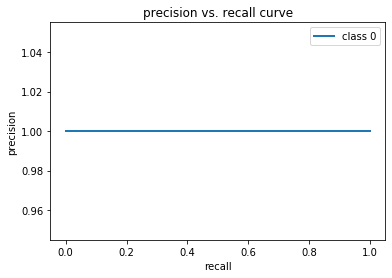

In [11]:
precision, recall, _ = precision_recall_curve(Y_valid, lr.predict(X_valid))
plt.plot(recall, precision, lw=2, label='class {}'.format(0))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [49]:
joblib.dump(lr, "classificator.pkl") 

['classificator.pkl']

In [15]:
X[[0,1]]

array([[1.        , 1.        , 1.        , ..., 0.90196078, 0.90196078,
        0.90196078],
       [1.        , 1.        , 0.99607843, ..., 1.        , 1.        ,
        0.99607843]])

In [19]:
X[np.where(Y==0)].shape

(721,)